# Principal component analysis, PCA (Análisis de componentes principal, ACP)

Cuando utilizamos algoritmos de selección de caracteristicas mantenemos las caracteristicas originales y seleccionamos las que mejoran el rendimiento de los modelos.
Mientras que la **reducción de dimensionalidad** se puede entender como la comprensión (o proyección) de los datos con el objetivo de mantener la mayor de la información.

**Principales razones para aplicar reducción de dimensionalidad:**

1. Almacenamiento
2. Eficiencia computaciónal
3. Mejorar el rendimiento predictivo, reduciendo la alta dimensionalidad
4. Visualización 2d

#### PCA

De esta forma encuentra las direcciones de varianza máxima en datos de alta dimensionalidad y los proyecta en un nuevo subespacio con dimensiones iguales o menores que el original.

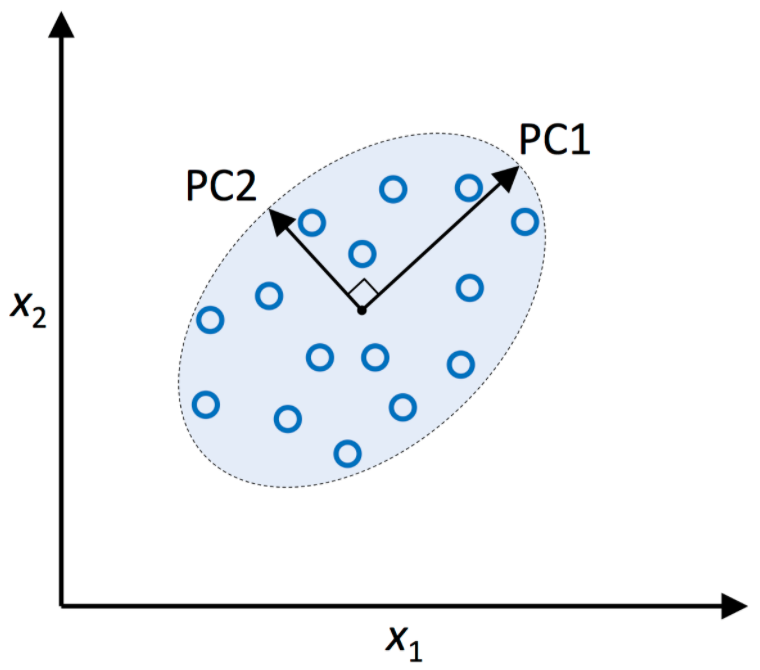

## Pasos a seguir para la transformación de los atributos 

**1.** Estandarizar el conjunto de datos de $d$ dimensiones

**2.** Construir la matriz de covarianza

**3.** Descomponer la matriz de covarianza en sus valores y vectores propios

**4.** Ordenar los valores propios por orden decreciente 

**5.** Seleccionar los $k$ vectores propios que corresponden a los $k$ valores propios mayores, donde $k$ es la dimensionalidad del nuevo subespacio de caracteristicas ($k<<d$)

**6.** Construir una matriz de proyección $W$ a partir de los $k$ eigenvectores

**7.** Transformar el conjunto de datos de entrada X, para obtener el nuevo subespacio de caracteristicas de $k$ dimensiones


_____________

# Matriz de covarianza 

**La covarianza**, es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias. Una covarianza positiva entre dos atributos indica que dichos atributos aumentan o disminuyen juntos; mientras que una covarianza negativa indica que los atributos varian en direcciones opuestas.

**La matriz de covarianza**, es una matriz cuadrada de $n$ dimensiones que recoge las varianzas en la diagonal principal y las covarianzas en los elementos fuera de la diagonal, de cada uno de los atributos que se tienen del dataset. 

Matriz de covarianza de 3 dimensiones

$$ \Sigma = \begin{bmatrix}\sigma_1^2 & \sigma_{12} & \sigma_{13} \\  \sigma_{21}& \sigma_2^2 &\sigma_{23} \\ \sigma_{31} & \sigma_{32} & \sigma_3^2\end{bmatrix} 
$$

Donde $\sigma^2$ es la varianza y $\sigma$ es la covarianza.

Varianza de un elemento:

$$\sigma^2 =  \frac{\sum_{n=1}^{n}(x_1 - \bar{x})^2}{n}$$


Covarianza entre dos elementos 

$$\sigma =  \frac{\sum_{n=1}^{n}(x_1 - \bar{x_1})(x_2 - \bar{x_2})}{n}$$

__________

# Valores y vectores propios

(Concepto de álgebra lineal)


Dado un sistema de ecuaciónes de la forma: $[A]X  = 0$, donde $[A]$ es la matriz de coeficientes y $X$ las variables. Se dice que el vector X puede obtener más de una solución diferente. Esto es, puede existir más de una solución para el sistema de ecuaciones.

El sistema matricial se puede representar de la siguiente forma: 

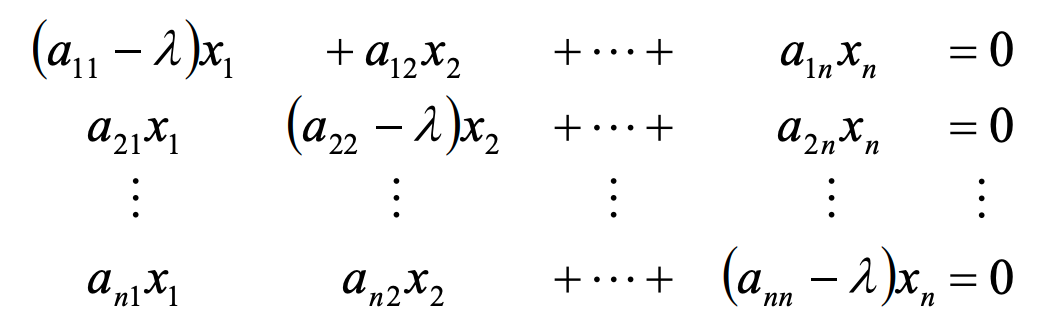

Donde $\lambda$ es un valor desconocido llamado valor propio, mientras que una solución $x$ para el sistema matricial se conoce como vector propio.
    

Obtenemos el determinante del sistema matricial, el cual da como resultado un polinomio, conocido como **ecuación característica** de grado $n$ y las raíces de este polinomio son los valores propios, pudiendo tener estos valores repetidos. 

Esta ecuación característica es de la forma: 

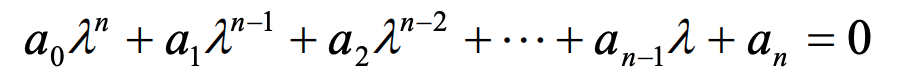

Una vez que se desarrollo la ecuación característica y se encontraron los **valores propios,** se procede a encontrar los vectores propios utilizando la siguiente ecuación:

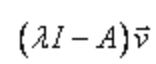

_______________

# Matriz de proyección $W$ y transformación de los patrones

La matriz $W$ va a permitir mapear un vector $x$ de muestra en un subespacio de características de $k$ dimensiones con menos dimensiones que el espacio de características original.

**Si el vector $x$**

$$ x = [x_1,x_2,x_3,x_4,...,x_d]$$  

**lo multiplicamos por la matriz de proyección $W$**

$$ x W$$  

**Obtenemos $z$**

$$z=[z_1,z_2,...,z_k]$$

# Aplicación PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("wine.data", header= None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 14)

In [5]:
df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

In [6]:
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [22]:
df.shape

(178, 14)

In [11]:
X = df.drop("Class label", axis=1).values
y = df["Class label"].values
sc = MinMaxScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (124, 13) (124,)
Test set: (54, 13) (54,)


In [12]:
X_train.shape

(124, 13)

## Autodescomposición de la matriz de covarianza.

In [13]:
#Le aplicamos la transpuesta porque lo necesita np.cov para obtener la matriz de covarianza de los atributos, sino nos daria una matriz de covarianza
#de los patrones
matriz_covarianza = np.cov(X_train.T)
len(matriz_covarianza)

13

In [14]:
matriz_covarianza.shape

(13, 13)

In [15]:
matriz_covarianza.shape

(13, 13)

In [16]:
eigen_vals, eigen_vecs = np.linalg.eigh(matriz_covarianza)
print("valores propios")
print(len(eigen_vals))
print("vectores propios")
print(len(eigen_vecs))

valores propios
13
vectores propios
13


In [17]:
eigen_vals

array([0.00426829, 0.00762092, 0.00782233, 0.01113765, 0.01209041,
       0.01292574, 0.0234565 , 0.02721347, 0.03163936, 0.04224406,
       0.04811923, 0.11543021, 0.21374728])

In [18]:
eigen_vecs.shape

(13, 13)

## Varianza explicada

In [19]:
tot = sum(eigen_vals)
var = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
print(var)

[0.3832550848217344, 0.20696971424490376, 0.08627916873685976, 0.07574483136153294, 0.056730288507749825, 0.04879453549565437, 0.04205819313074547, 0.023176233022345696, 0.02167846310595722, 0.019970125203400035, 0.014025661602684352, 0.013664534205156799, 0.007653166561275371]


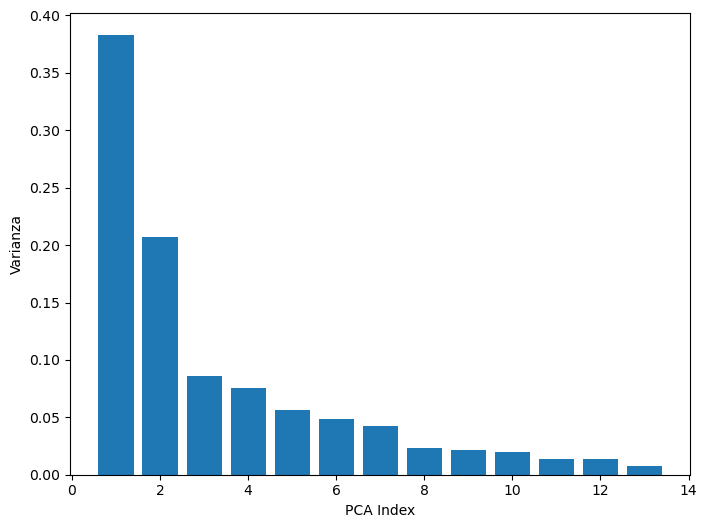

In [20]:
#Esta grafica nos sirve para seleccionar la k 
#buscamos que al seleccionar la k obtengamos mayor al 60% de la varianza.
#k no representa las columnas iniciales sino los eigenvectores con los que voy a crear W y hacer la proyección

plt.figure(figsize=(8,6))
plt.bar(range(1, 14), var)
plt.ylabel('Varianza')
plt.xlabel('PCA Index')
plt.show()

## Transformación de características

In [21]:
# Hacer una lista de las tuplas (eigenvalor, eigenvector)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs[0]

(0.0042682892635683934,
 array([-0.02683913,  0.02084675, -0.29686514,  0.19227607,  0.12711587,
        -0.33884337,  0.81650167,  0.11138491, -0.20828395,  0.04441213,
        -0.09429084, -0.09708868,  0.00442782]))

In [22]:
# Ordenar las tuplas (autovalor, autovector) de mayor a menor
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [23]:
#eigen_pairs

In [24]:
[i for i in eigen_pairs[:3]]

[(0.21374728364464027,
  array([-0.12169064,  0.24590457,  0.01995963,  0.2044897 , -0.0859184 ,
         -0.37854067, -0.39663984,  0.36380954, -0.2485649 ,  0.09548845,
         -0.24441605, -0.47812059, -0.28794321])),
 (0.11543020815270545,
  array([-0.56806043, -0.19823431, -0.14805133,  0.08197973, -0.16610946,
         -0.08184088, -0.02188908, -0.02188706, -0.05914037, -0.53867537,
          0.23067457,  0.22575431, -0.41985434])),
 (0.04811922576630482,
  array([ 0.0128536 ,  0.64054717,  0.29673153,  0.45089778, -0.06150372,
          0.19188747,  0.15146855,  0.02282106,  0.19717142, -0.07271403,
         -0.15962727,  0.35966114, -0.18737066]))]

In [25]:
w = pd.DataFrame()
w["a1"] = eigen_pairs[0][1]
w["a2"] = eigen_pairs[1][1]
#w["a3"] = eigen_pairs[2][1]
w

,a1,a2
0,-0.121691,-0.568060
1,0.245905,-0.198234
2,0.019960,-0.148051
3,0.204490,0.081980
4,-0.085918,-0.166109
5,-0.378541,-0.081841
6,-0.396640,-0.021889
7,0.363810,-0.021887
8,-0.248565,-0.059140
9,0.095488,-0.538675


In [26]:
X_train_pca = X_train.dot(w)

In [27]:
X_train_pca.shape

(124, 2)

In [28]:
pd.DataFrame(X_train_pca)

,0,1
0,-0.845894,-0.702009
1,-0.011308,-1.112572
2,0.191520,-1.096382
3,0.071239,-1.176283
4,-0.071889,-1.001212
...,...,...
119,-0.524850,-0.188749
120,-0.047913,-0.629931
121,-0.923076,-0.318296
122,-0.028346,-0.860743


In [29]:
X_train_pca.shape

(124, 2)

# Implementación en Sckit-learn

In [32]:
X_train.shape

(124, 13)

In [33]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.38325508, 0.20696971, 0.08627917, 0.07574483, 0.05673029,
       0.04879454, 0.04205819, 0.02317623, 0.02167846, 0.01997013,
       0.01402566, 0.01366453, 0.00765317])

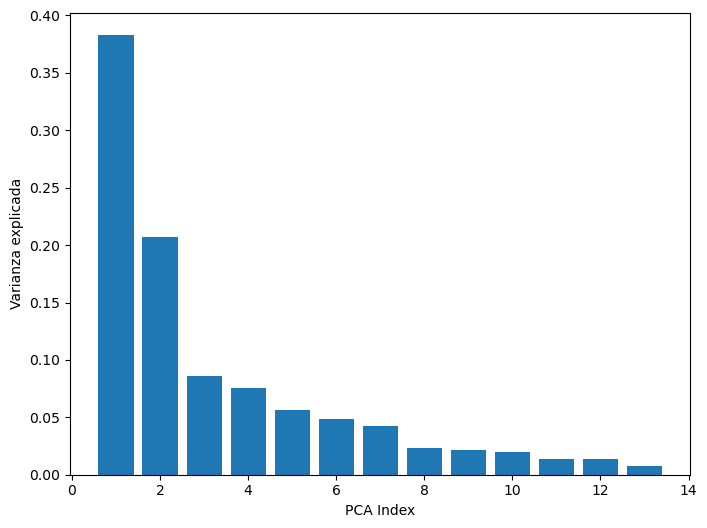

In [34]:

plt.figure(figsize=(8,6))
plt.bar(range(1, 14), pca.explained_variance_ratio_)
plt.ylabel('Varianza explicada')
plt.xlabel('PCA Index')
plt.show()

In [35]:
X_train_pca.shape

(124, 13)

In [36]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

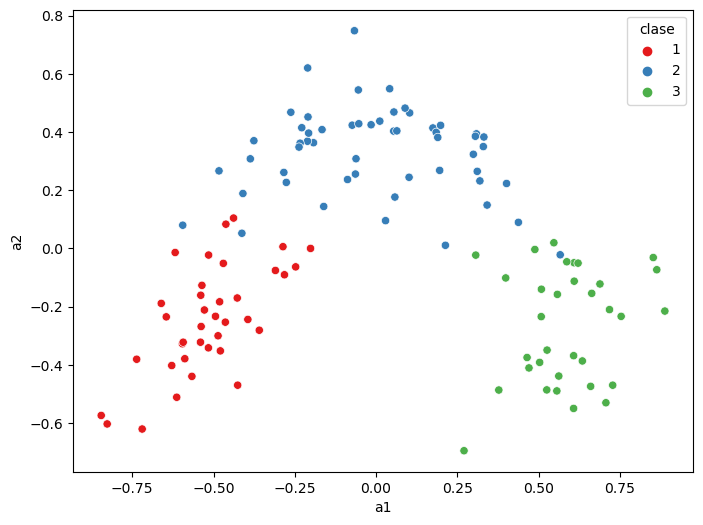

In [38]:
df1 = pd.DataFrame()
df1["a1"]= X_train_pca[:,0]
df1["a2"] = X_train_pca[:,1]
df1["clase"]=y_train
plt.figure(figsize=(8,6))
sns.scatterplot(x=df1["a1"],y=df1["a2"], hue = df1["clase"], palette="Set1")
plt.show()